<a href="https://colab.research.google.com/github/Daniel-F78/SSN/blob/main/T4_M%C3%A9todo_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Opción 1: Ising Model**

Convertir los sistemas Ising Full e Ising Snapshot en 1D. En dichos sistemas analizar comportamineto respecto al original y Temperatura de Curie

Voy a hacer las simulaciones pertinentes de dicho sistema 1D aquí y las comparaciones las haré con el sistema otorgado por el profesorado.

**Ising Full**

In [89]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

Generamos estado inicial, con N spins

In [90]:
def IS(N):
  state=2*np.random.randint(2, size=(N))-1
  return state

In [91]:
def MCM(config,beta):
  for i in range(N):
    a=np.random.randint(0,N)
    s=config[a]
    nb=config[(a+1)%N]+config[(a-1)%N]
    cost=2*s*nb
    if cost<0:
      s*=-1
    elif rand()<np.exp(-cost*beta):
      s*=-1
    config[a]=s
  return config

In [92]:
def calcE(config):
  E=0
  for i in range(N):
    s=config[i]
    nb=config[(i+1)%N]+config[(i-1)%N]
    E-=nb*s
  return E/2

In [93]:
def calcM(config):
  mag=np.sum(config)
  return mag

Ahora ponemos los parámetros de cálculo

In [94]:
nT=2**10
N=2**8
EQSteps=2**10
MCSteps=2**10
n1=1.0/(MCSteps*N)
n2=1.0/(MCSteps**2*N**2)

Generamos una distribución de Temperaturas aleatorias

In [95]:
while True:
  Tm=2.269
  T=np.random.normal(Tm, .64, nT)
  T=T[(T>1.2) & (T<3.8)]
  if len(T)>0:
    break
nT=np.size(T)

Hacemos listas de las magnitudes

In [96]:
Energy=np.zeros(nT)
Magnetization=np.zeros(nT)
SpecificHeat=np.zeros(nT)
Susceptibility=np.zeros(nT)

Hacemos el Loop

In [97]:
print('Starting Simulations at ',nT,' different temperatures.')
for m in range(nT):
    E1 = M1 = E2 = M2 = 0
    config = IS(N)
    iT=1.0/T[m]
    iT2=iT*iT
    print('Simulation ',m+1,' of',nT,' at reduced temperature T=',T[m])

    for i in range(EQSteps):
        MCM(config, iT)

    for i in range(MCSteps):
        MCM(config, iT)
        Ene = calcE(config)
        Mag = calcM(config)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene
        Energy[m]         = n1*E1
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

Starting Simulations at  962  different temperatures.
Simulation  1  of 962  at reduced temperature T= 2.1932854604301255
Simulation  2  of 962  at reduced temperature T= 2.754111838972383
Simulation  3  of 962  at reduced temperature T= 2.1868106389324993
Simulation  4  of 962  at reduced temperature T= 2.0562197460384963
Simulation  5  of 962  at reduced temperature T= 2.6444639451766827
Simulation  6  of 962  at reduced temperature T= 3.39728787760328
Simulation  7  of 962  at reduced temperature T= 2.9441833474178334
Simulation  8  of 962  at reduced temperature T= 2.4750105487703506
Simulation  9  of 962  at reduced temperature T= 3.1269321338089933
Simulation  10  of 962  at reduced temperature T= 1.3387932142787484
Simulation  11  of 962  at reduced temperature T= 1.572184436162258
Simulation  12  of 962  at reduced temperature T= 3.2157422601598653
Simulation  13  of 962  at reduced temperature T= 2.549075924034265
Simulation  14  of 962  at reduced temperature T= 1.23223081617

Falta hacer Plot:

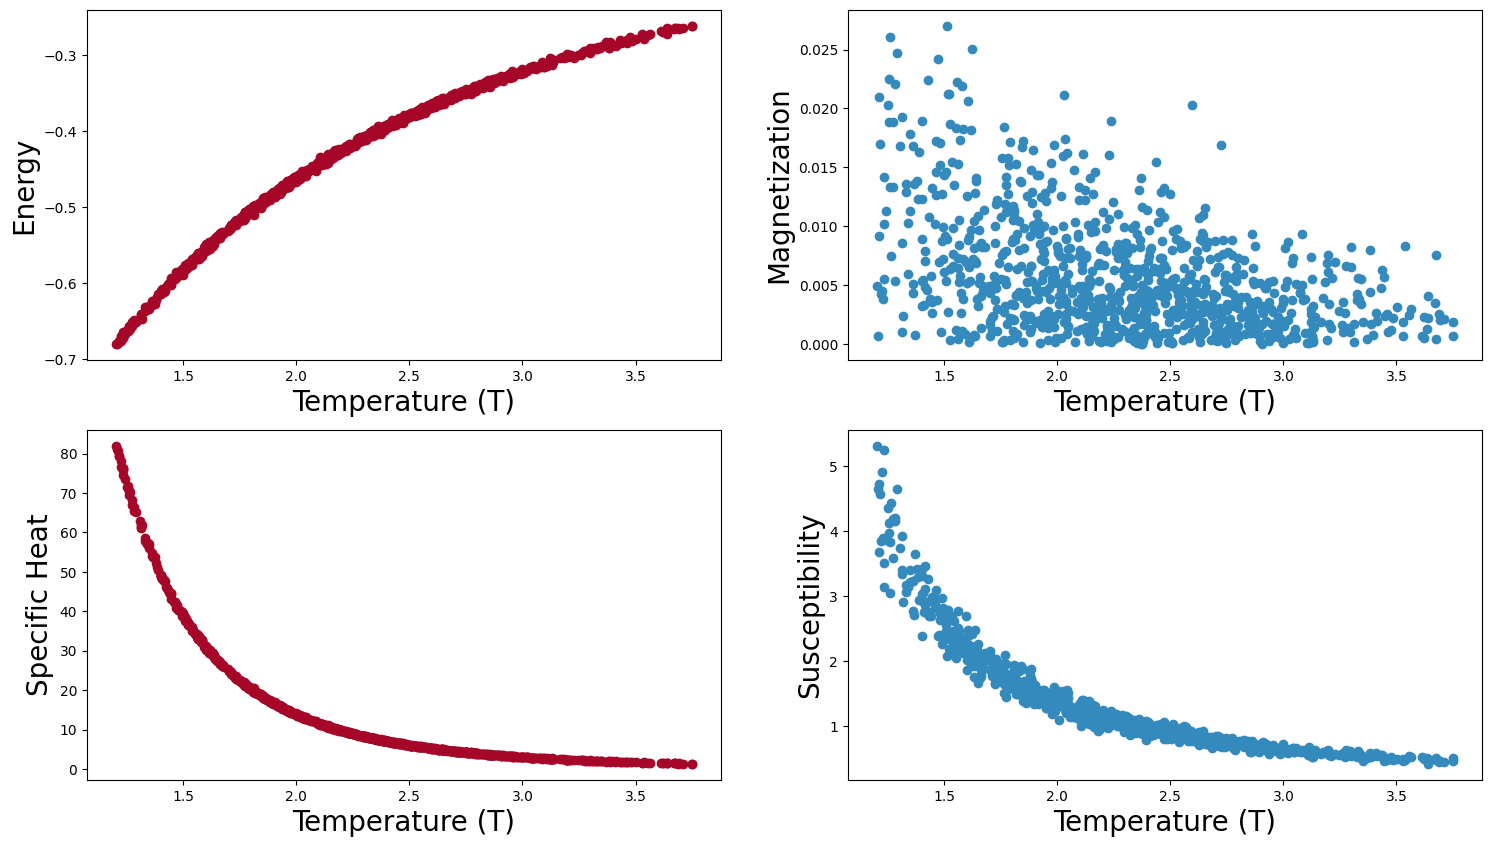

In [98]:
f=plt.figure(figsize=(18,10))
sp=f.add_subplot(2,2,1)
plt.plot(T,Energy,'o',color='#A60628')
plt.xlabel('Temperature (T)',fontsize=20)
plt.ylabel('Energy',fontsize=20)

sp=f.add_subplot(2,2,2)
plt.plot(T,abs(Magnetization),'o',color='#348ABD')
plt.xlabel('Temperature (T)',fontsize=20)
plt.ylabel('Magnetization',fontsize=20)

sp=f.add_subplot(2,2,3)
plt.plot(T,SpecificHeat,'o',color='#A60628')
plt.xlabel('Temperature (T)',fontsize=20)
plt.ylabel('Specific Heat',fontsize=20)

sp=f.add_subplot(2,2,4)
plt.plot(T,Susceptibility,'o',color='#348ABD')
plt.xlabel('Temperature (T)',fontsize=20)
plt.ylabel('Susceptibility',fontsize=20)
plt.show()

**Ising snapshot**

In [99]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

Funciones que definen el modelo 1D

In [100]:
def MCM(config,N,beta):
  for i in range(N):
    a=np.random.randint(0,N)
    s=config[a]
    nb=config[(a+1)%N]+config[(a-1)%N]
    cost=2*s*nb

    if cost<0:
      s*=-1
    elif rand()<np.exp(-cost*beta):
      s*=-1
    config[a]=s
  return config

Función que hace la imagen de configuración de spin

In [101]:
def ConfPlot(f,config,i,N):
  config_2d=config.reshape(1,-1)
  X, Y = np.meshgrid(range(N), [0])
  plt.pcolormesh(X, Y, config_2d, vmin=-1.0, vmax=1.0, cmap='RdBu_r',edgecolors='k',linewidth=1);
  plt.title('MC iteration=%d'%i)
  plt.axis('tight')
  plt.pause(0.1)

Cálculo de la energía de la configuración en función de la temperatura

In [102]:
def calcE(config):
  E=0
  for i in range(N):
    s=config[i]
    nb=config[(i+1)%N]+config[(i-1)%N]
    E +=-nb*s
  return E/2

Cálculo de la magnetización para una configuración

In [103]:
def calcM(config):
  mag=np.sum(config)
  return mag

Programa principal, incliumos los valores de número de electrones, temperatura y número de interacciones de Monte Carlo

In [104]:
N=64
T=float(input("\n Please enter temperature in reduced units (suggestion 1.2): "))
MCI=int(input("\n Enter number of Monte Carlo iterations (suggestion 1000):"))


 Please enter temperature in reduced units (suggestion 1.2): 2.4

 Enter number of Monte Carlo iterations (suggestion 1000):1000


Valores de Magnetización y Energía

In [105]:
step=[]
M=[]
E=[]

Condición Inicial

In [106]:
config=2*np.random.randint(2, size=(N))-1
Ene=calcE(config)/(N*N)
Mag=calcM(config)/(N*N)
t=0
print('MC step=',t,' Energy=',Ene,' M=',Mag)
step.append(t)
E.append(Ene)
M.append(Mag)

MC step= 0  Energy= -0.0029296875  M= 0.001953125


Imagen de la Condición Inicial

Initial configuration:
[-1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1
  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1]


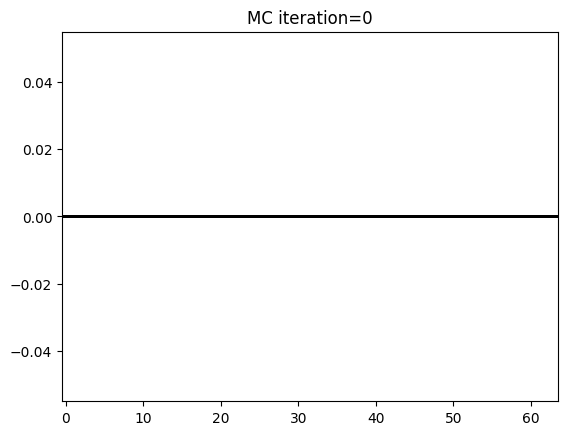

In [107]:
print('Initial configuration:')
print(config)
f = plt.figure(dpi=100)
ConfPlot(f, config, 0, N)
plt.show()

Mostramos todas las interacciones

Starting MC simulation

MC step= 10  Energy= -0.0068359375  M= 0.0009765625
[ 1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1]


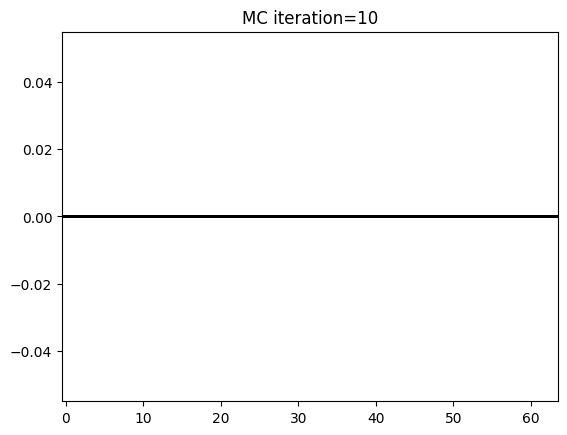


MC step= 20  Energy= -0.005859375  M= 0.0
[ 1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1
  1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1
 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1]


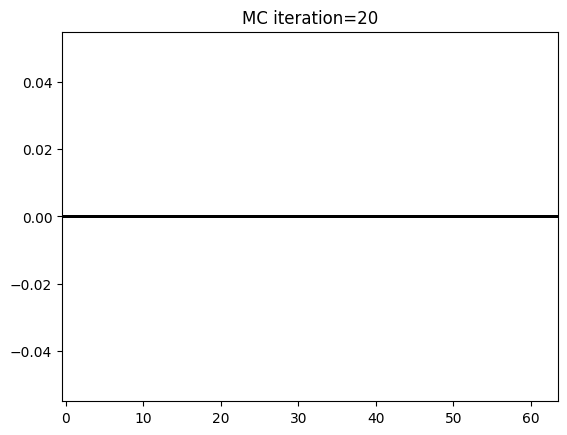


MC step= 30  Energy= -0.005859375  M= 0.00146484375
[ 1 -1 -1 -1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1
  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1]


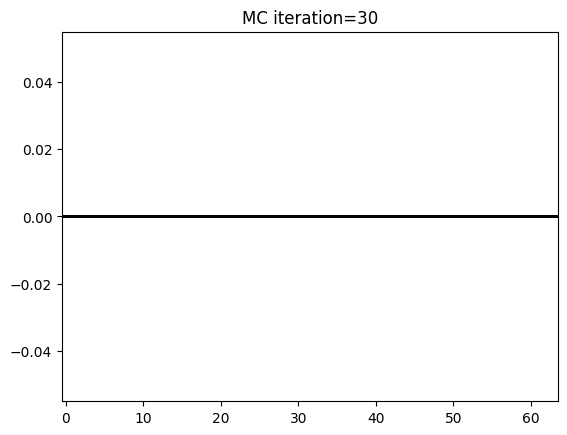


MC step= 40  Energy= -0.0068359375  M= -0.00048828125
[-1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1  1  1]


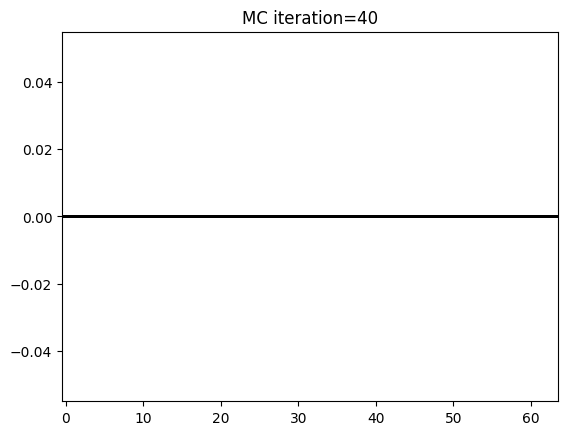


MC step= 50  Energy= -0.005859375  M= -0.00146484375
[ 1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1  1
  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1]


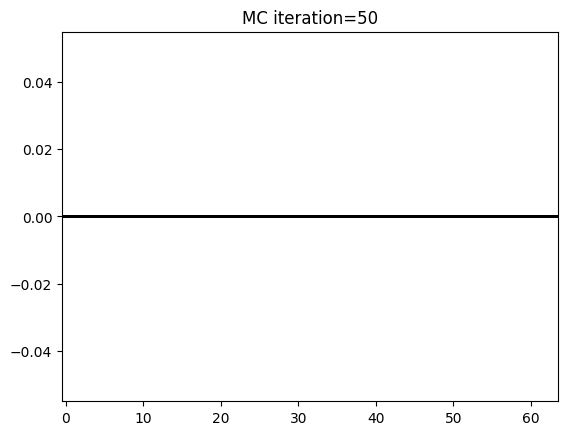


MC step= 60  Energy= -0.0068359375  M= -0.0029296875
[ 1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1
  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1]


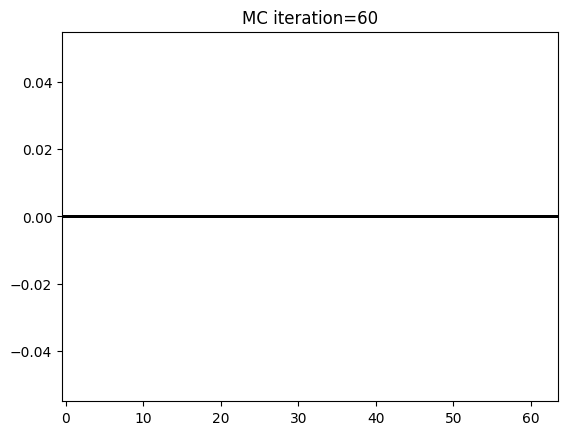


MC step= 70  Energy= -0.005859375  M= 0.00146484375
[ 1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1  1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1]


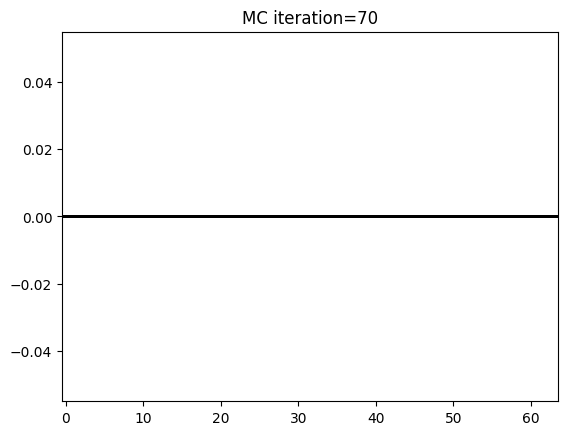


MC step= 80  Energy= -0.005859375  M= -0.00341796875
[ 1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1
  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1]


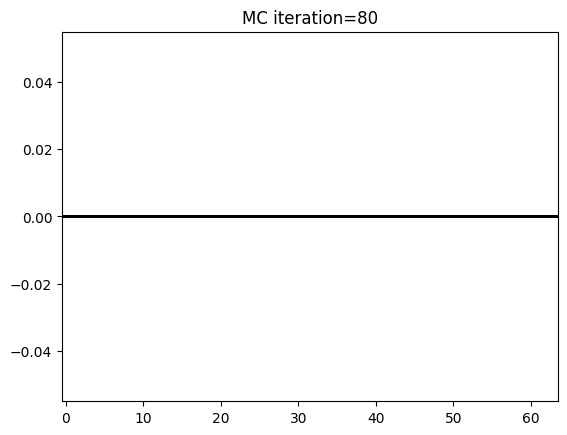


MC step= 90  Energy= -0.0078125  M= -0.00048828125
[ 1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1]


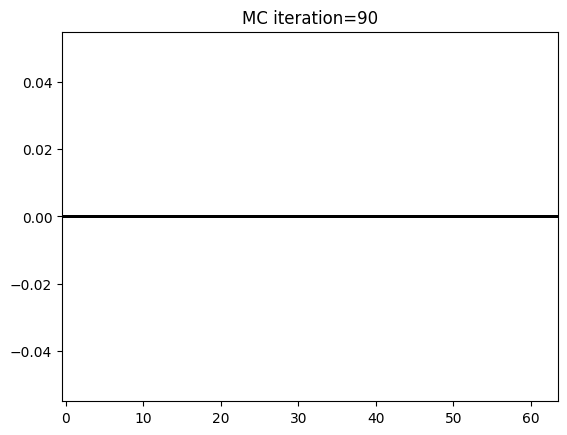


MC step= 100  Energy= -0.0078125  M= 0.0009765625
[-1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1
 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1]


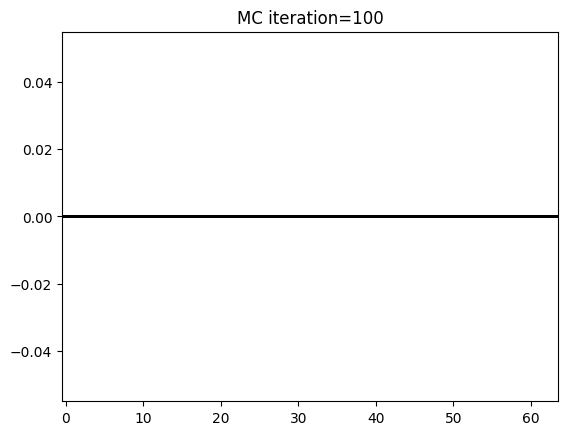


MC step= 110  Energy= -0.005859375  M= 0.0009765625
[ 1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1]


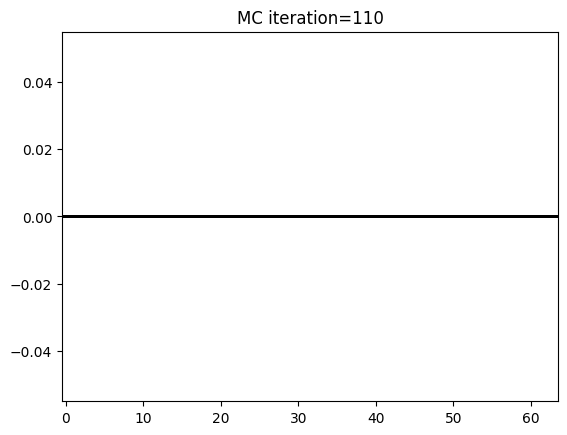


MC step= 120  Energy= -0.0048828125  M= -0.00048828125
[-1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1
  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1  1]


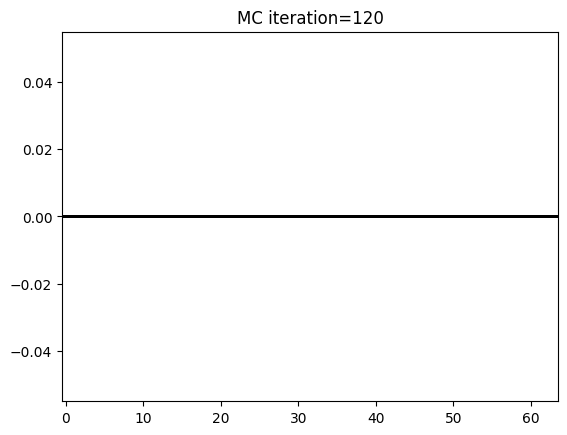


MC step= 130  Energy= -0.005859375  M= 0.0029296875
[-1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1]


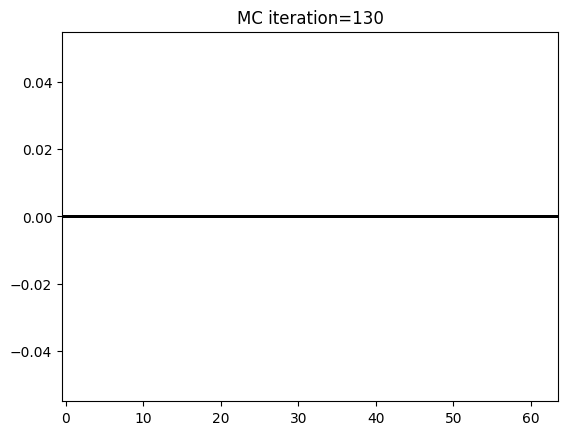


MC step= 140  Energy= -0.0048828125  M= 0.0009765625
[-1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1]


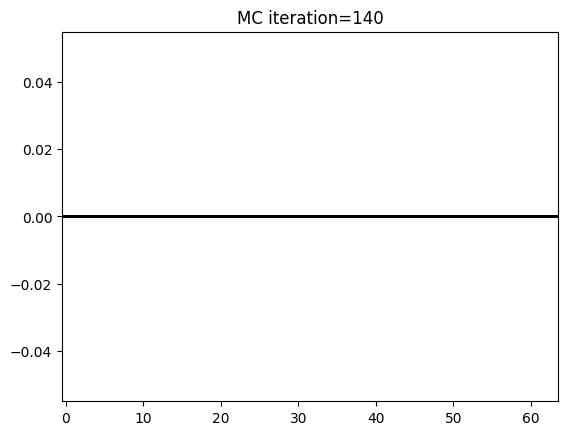


MC step= 150  Energy= -0.00390625  M= -0.001953125
[ 1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1
  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1]


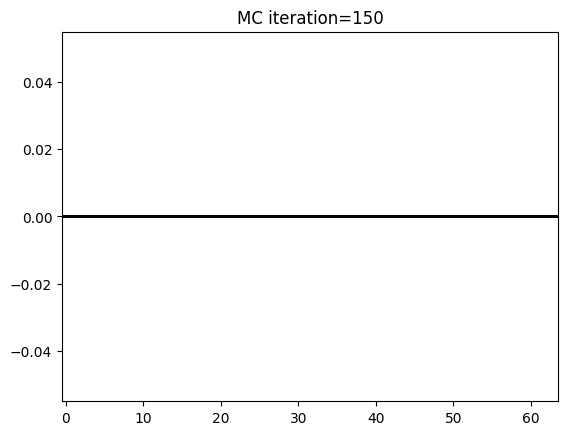


MC step= 160  Energy= -0.0078125  M= -0.00390625
[-1 -1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1]


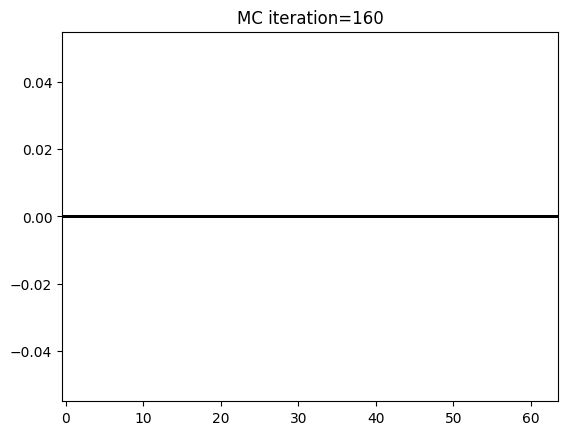


MC step= 170  Energy= -0.009765625  M= -0.00634765625
[-1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1]


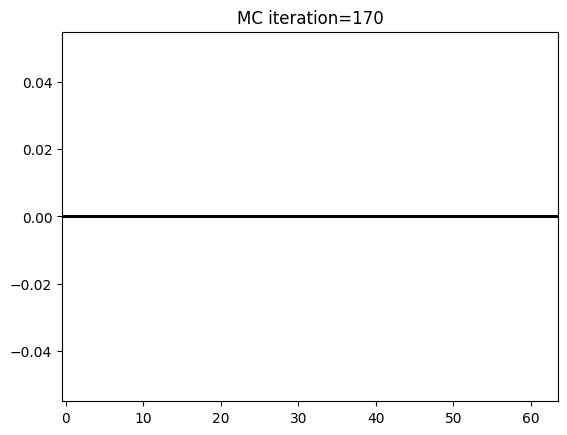


MC step= 180  Energy= -0.005859375  M= -0.005859375
[-1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1
 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1]


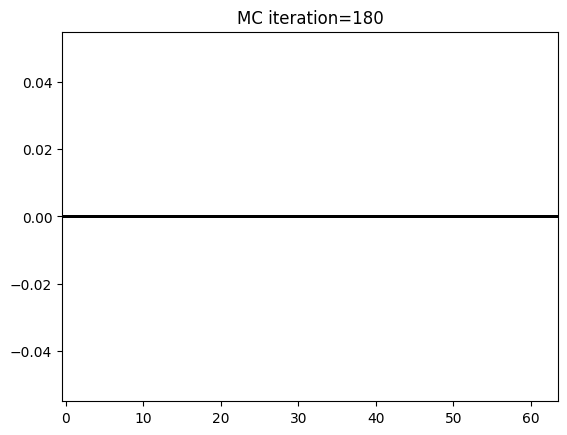


MC step= 190  Energy= -0.0068359375  M= -0.0029296875
[-1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1]


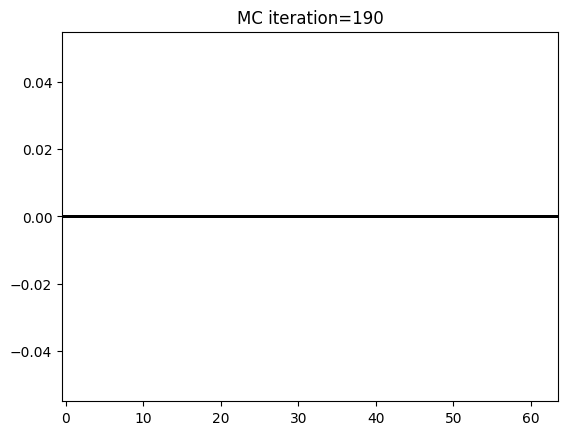


MC step= 200  Energy= -0.0048828125  M= -0.001953125
[-1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1  1]


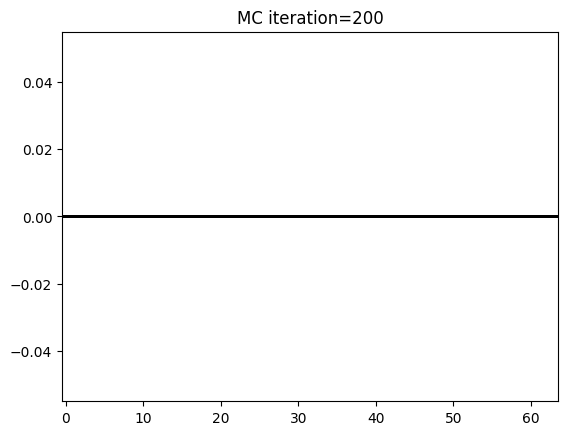


MC step= 210  Energy= -0.0068359375  M= 0.0029296875
[-1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1]


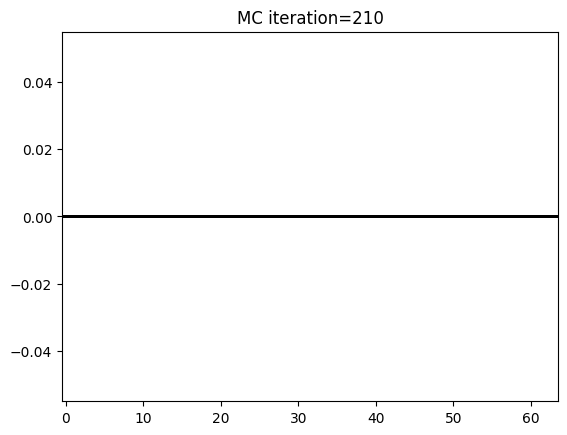


MC step= 220  Energy= -0.0078125  M= 0.00048828125
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1
 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1]


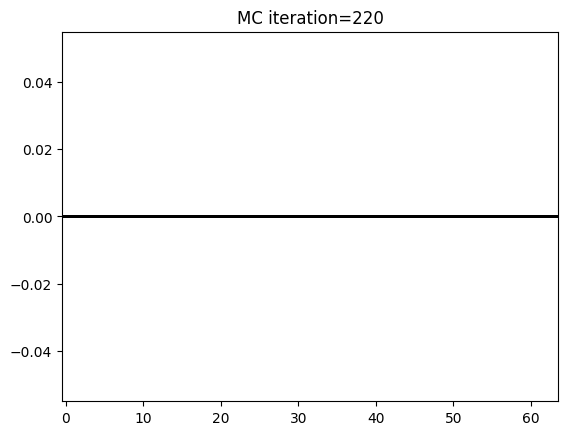


MC step= 230  Energy= -0.0078125  M= -0.00830078125
[-1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1]


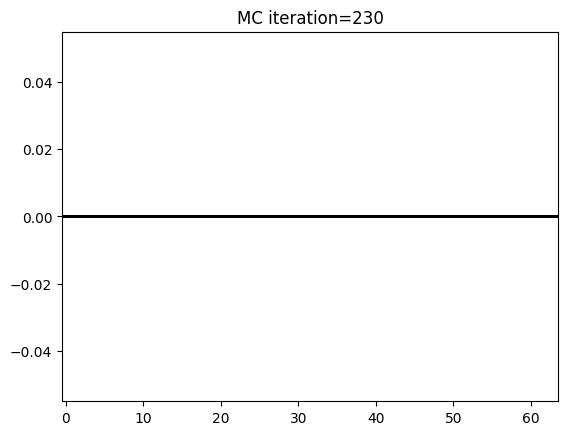


MC step= 240  Energy= -0.005859375  M= 0.00341796875
[-1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1
 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1]


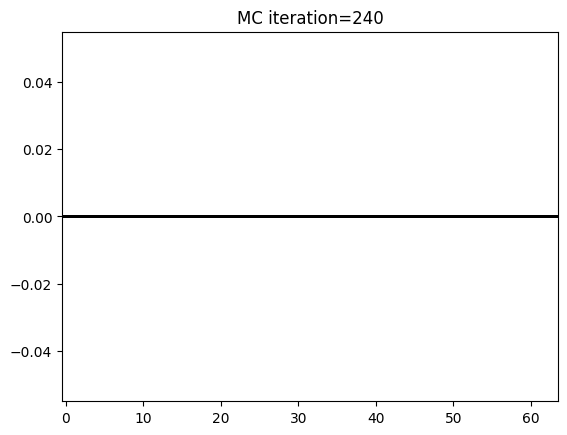


MC step= 250  Energy= -0.0068359375  M= -0.0009765625
[ 1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1]


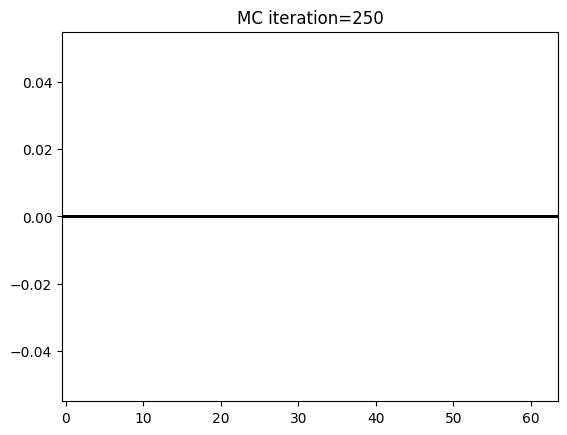


MC step= 260  Energy= -0.0068359375  M= 0.00048828125
[ 1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1
 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1]


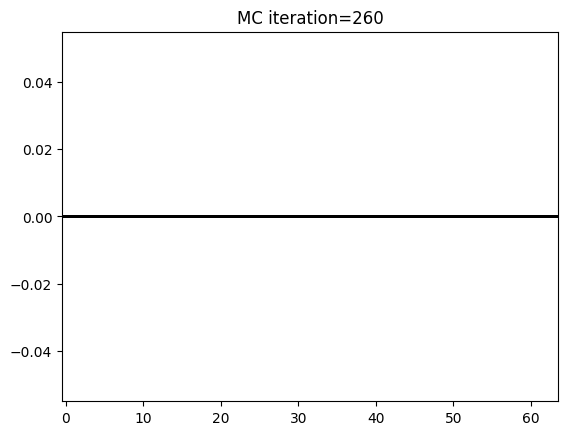


MC step= 270  Energy= -0.005859375  M= 0.0029296875
[ 1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1
  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1]


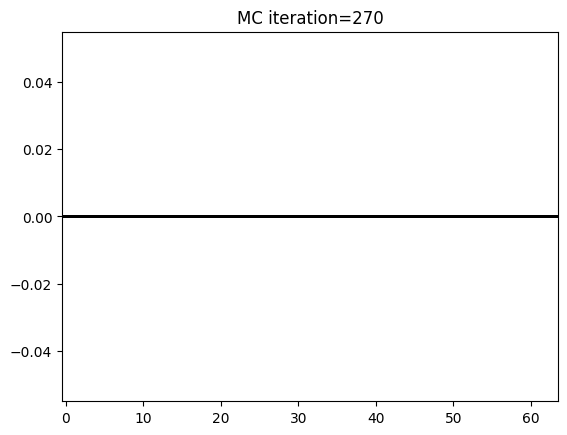


MC step= 280  Energy= -0.005859375  M= -0.0009765625
[ 1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1  1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1]


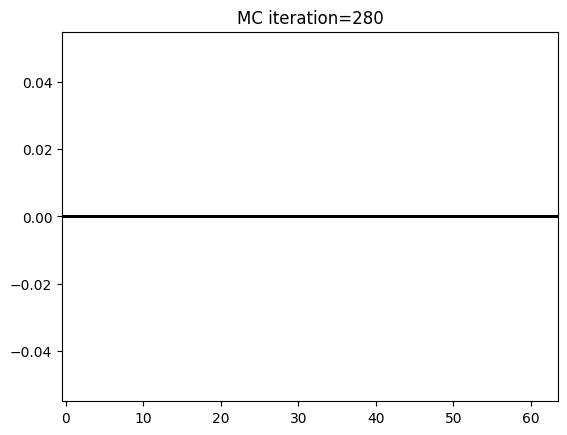


MC step= 290  Energy= -0.0068359375  M= 0.00390625
[ 1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


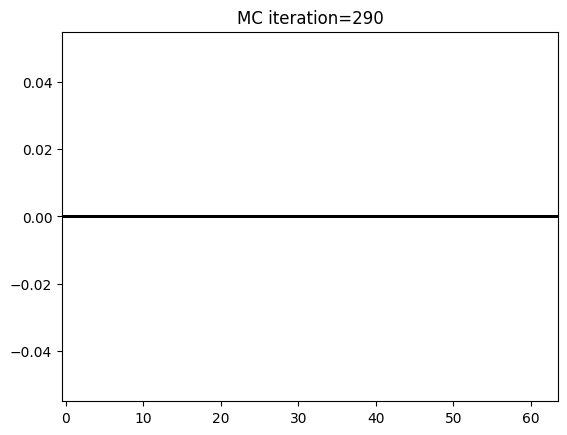


MC step= 300  Energy= -0.0048828125  M= 0.00048828125
[-1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1
 -1  1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1]


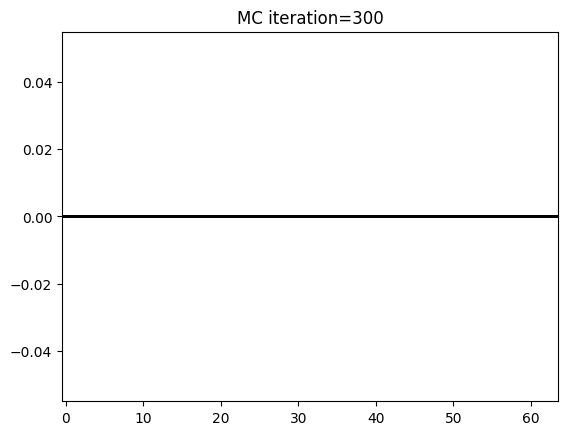


MC step= 310  Energy= -0.0029296875  M= 0.00341796875
[ 1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1
  1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1]


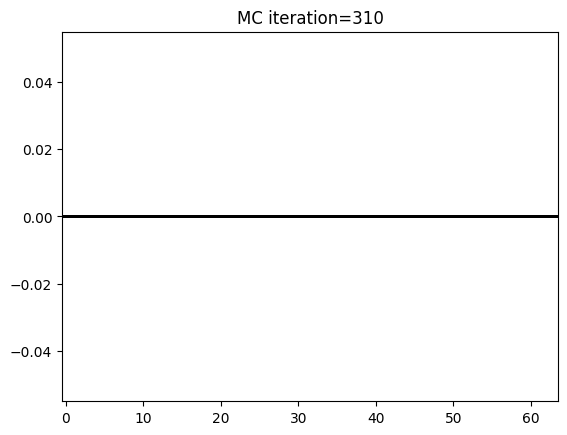


MC step= 320  Energy= -0.00390625  M= 0.00146484375
[ 1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1  1
  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1]


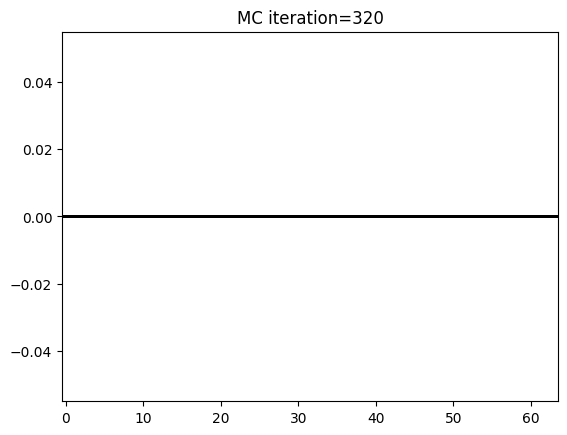


MC step= 330  Energy= -0.005859375  M= 0.0
[ 1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1]


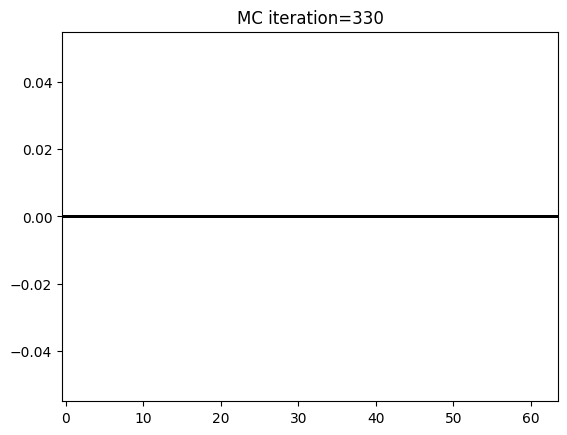


MC step= 340  Energy= -0.005859375  M= -0.00244140625
[ 1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1]


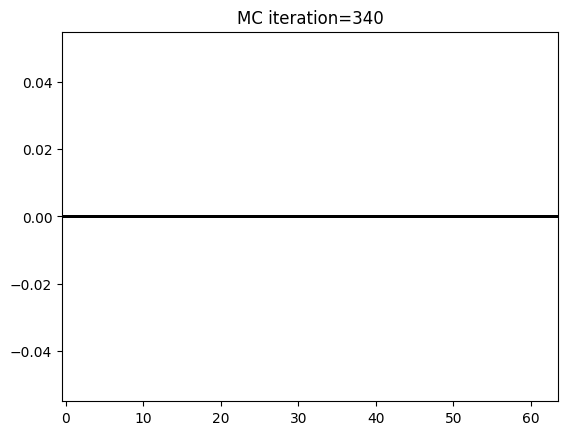


MC step= 350  Energy= -0.0048828125  M= 0.0
[-1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1  1 -1 -1 -1
 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1]


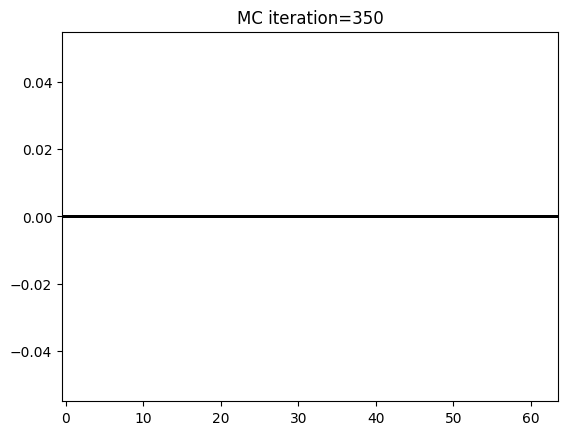


MC step= 360  Energy= -0.0068359375  M= -0.00390625
[-1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1]


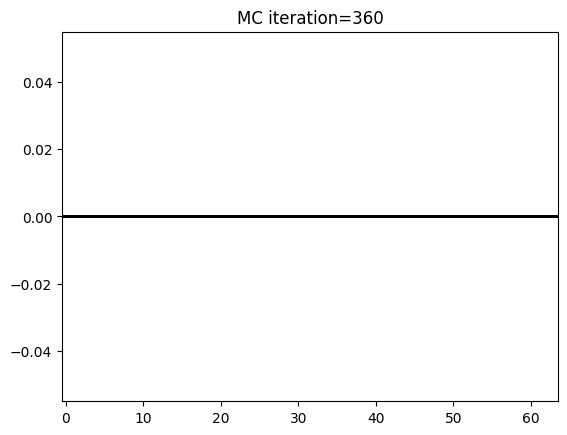


MC step= 370  Energy= -0.0068359375  M= 0.001953125
[ 1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1
  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1]


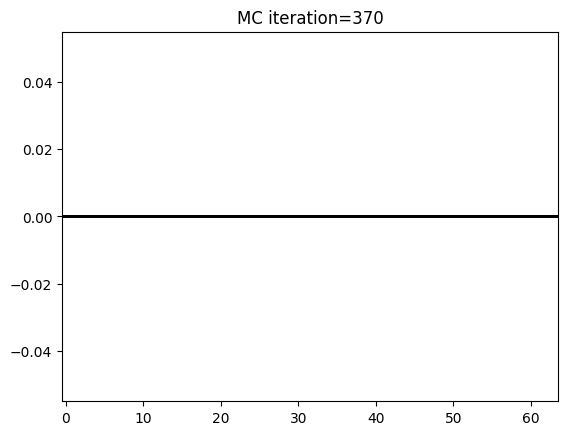


MC step= 380  Energy= -0.0048828125  M= -0.00048828125
[ 1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1
  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1
 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1]


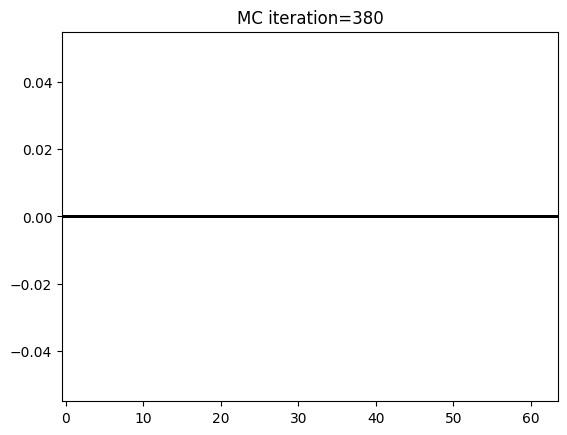


MC step= 390  Energy= -0.005859375  M= 0.00341796875
[ 1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1
  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1]


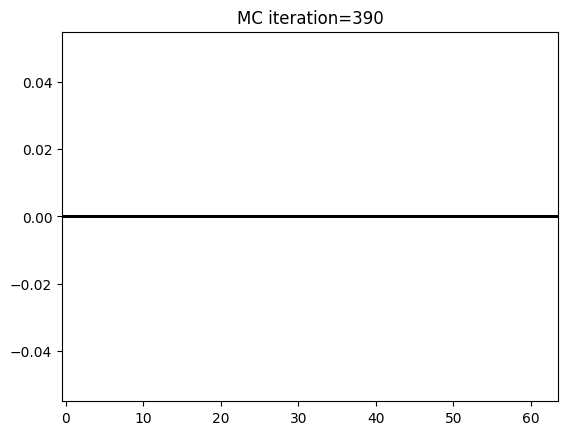


MC step= 400  Energy= -0.0068359375  M= -0.00146484375
[ 1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1]


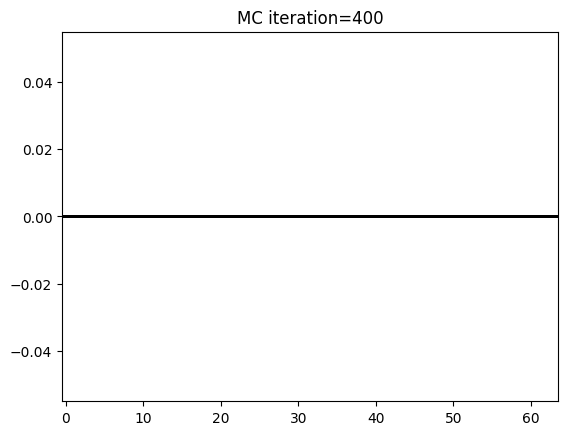


MC step= 410  Energy= -0.0048828125  M= -0.00244140625
[-1  1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1
  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1]


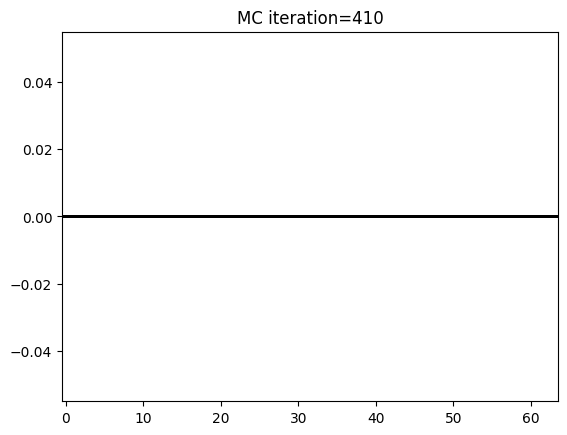


MC step= 420  Energy= -0.0068359375  M= -0.00244140625
[ 1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1
 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1]


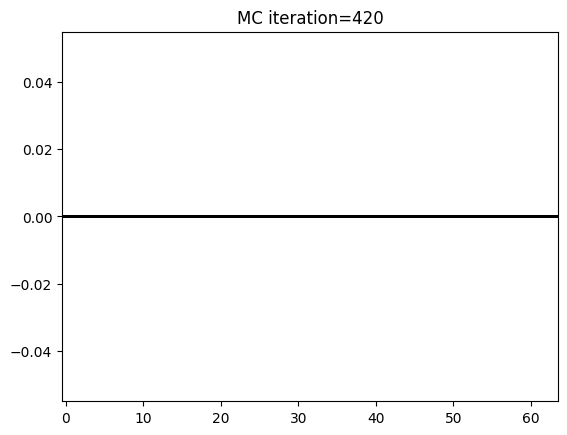


MC step= 430  Energy= -0.00390625  M= 0.0
[ 1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1
  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1]


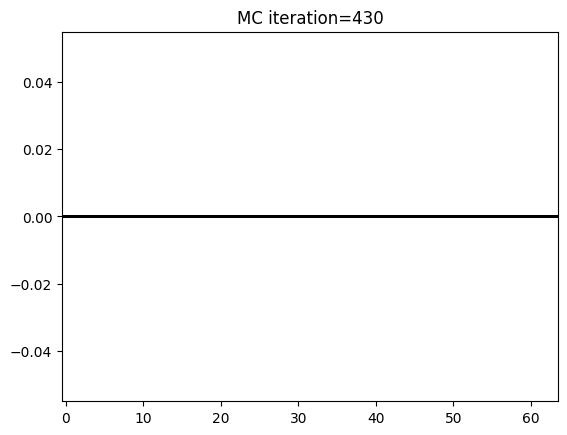


MC step= 440  Energy= -0.0078125  M= -0.00390625
[ 1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1]


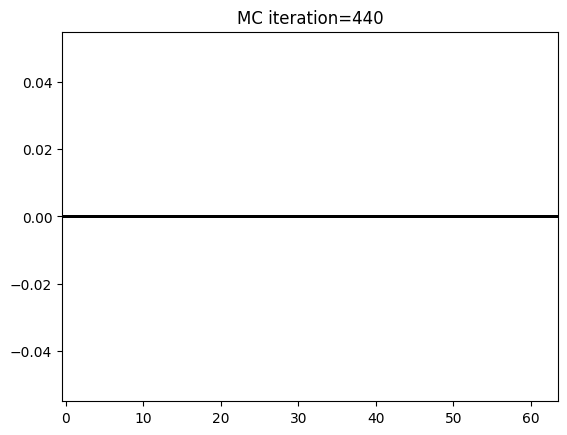


MC step= 450  Energy= -0.0048828125  M= 0.00537109375
[-1 -1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1]


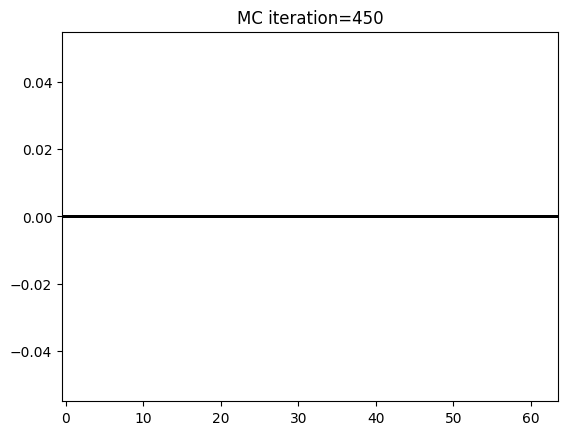


MC step= 460  Energy= -0.0048828125  M= -0.00244140625
[ 1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1]


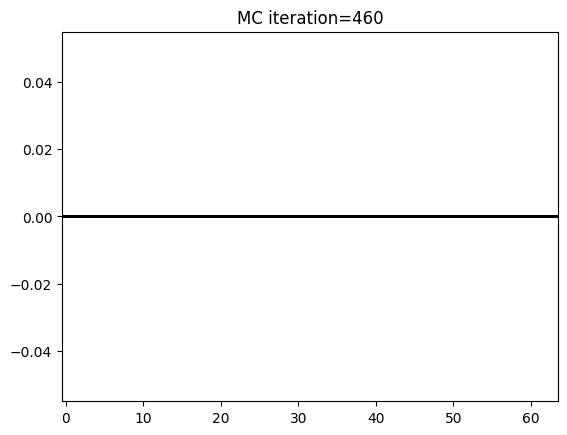


MC step= 470  Energy= -0.0048828125  M= -0.00048828125
[ 1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1
  1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1]


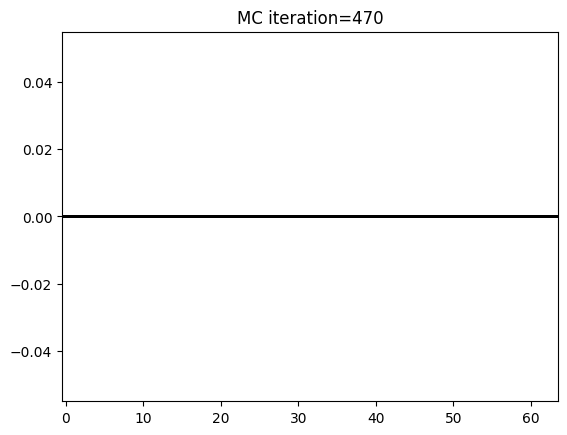


MC step= 480  Energy= -0.0078125  M= 0.00439453125
[ 1  1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1]


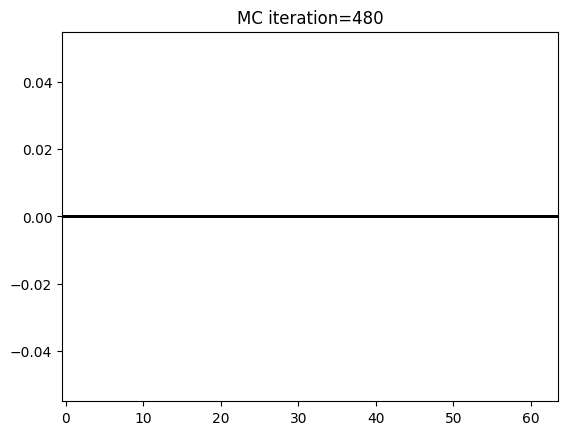


MC step= 490  Energy= -0.005859375  M= -0.00732421875
[-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1]


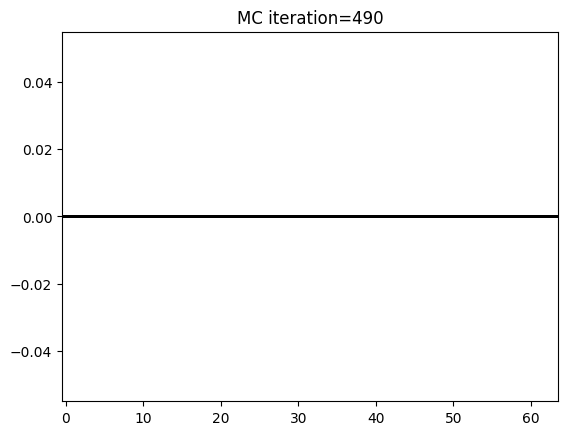


MC step= 500  Energy= -0.0068359375  M= 0.0029296875
[-1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1
  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1]


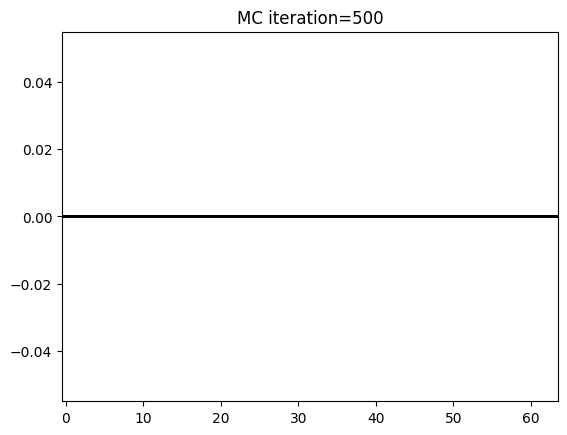


MC step= 510  Energy= -0.0087890625  M= -0.0029296875
[-1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1
 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


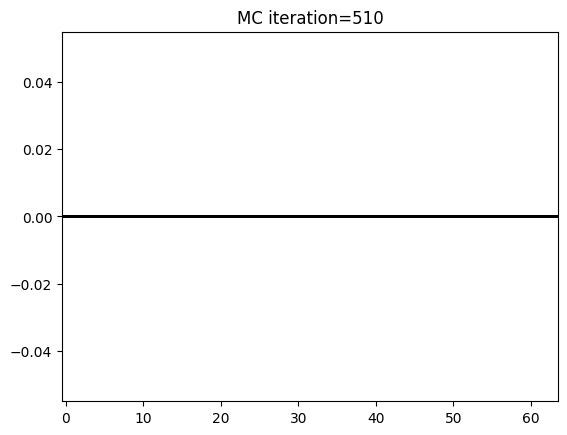


MC step= 520  Energy= -0.0087890625  M= -0.00048828125
[ 1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1]


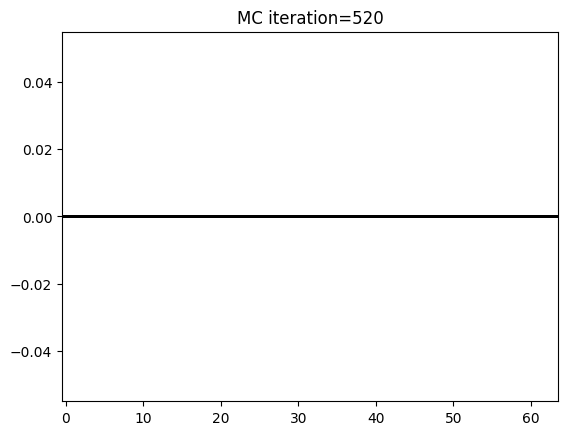


MC step= 530  Energy= -0.0087890625  M= -0.00244140625
[-1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1]


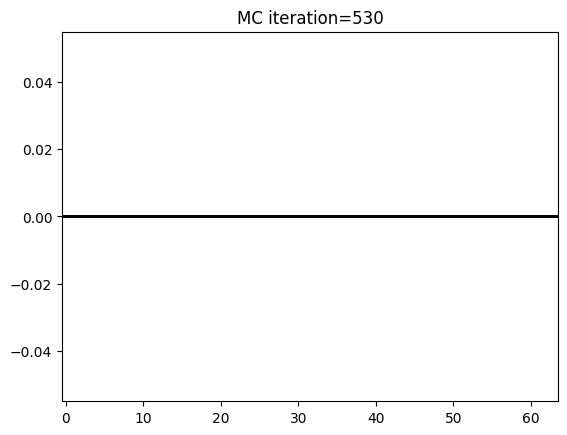


MC step= 540  Energy= -0.0078125  M= -0.00439453125
[ 1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1]


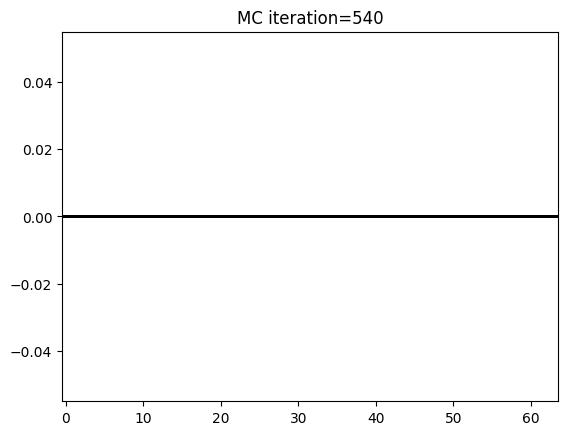


MC step= 550  Energy= -0.0048828125  M= -0.0009765625
[ 1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1
  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1
  1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1  1]


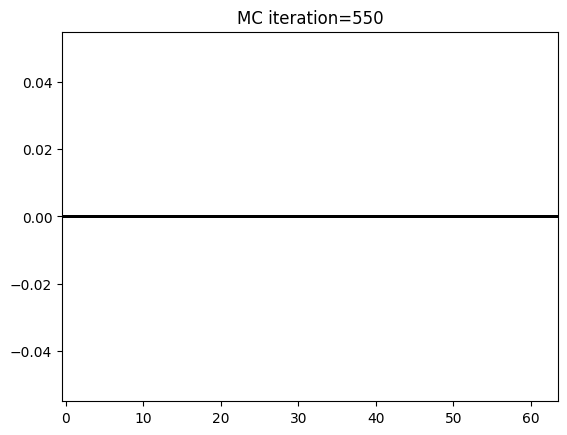


MC step= 560  Energy= -0.0068359375  M= 0.00244140625
[-1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1]


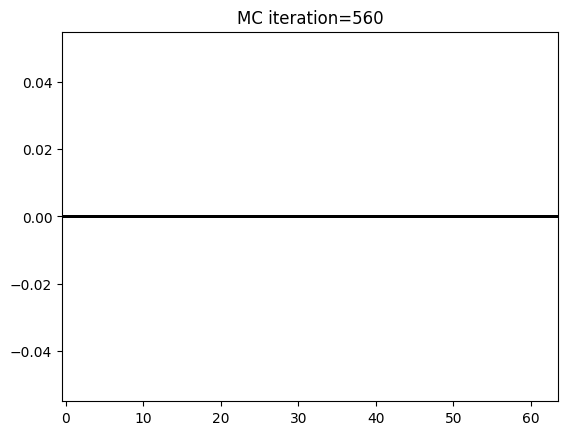


MC step= 570  Energy= -0.0068359375  M= -0.0068359375
[-1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1]


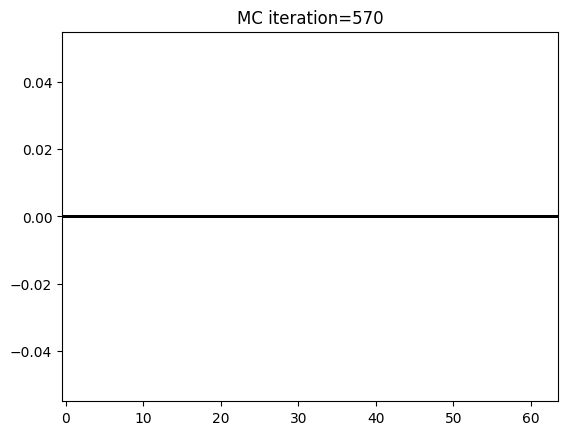


MC step= 580  Energy= -0.0087890625  M= 0.0029296875
[-1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1]


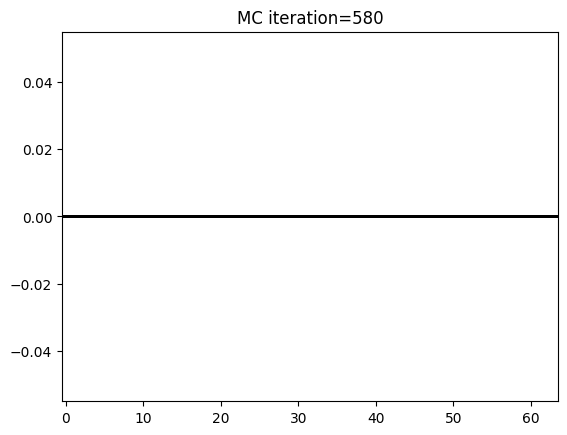


MC step= 590  Energy= -0.005859375  M= 0.0068359375
[ 1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1
  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1]


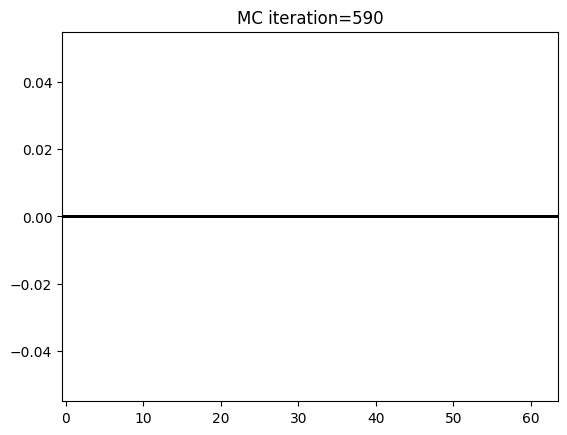


MC step= 600  Energy= -0.005859375  M= -0.00439453125
[ 1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1
  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1]


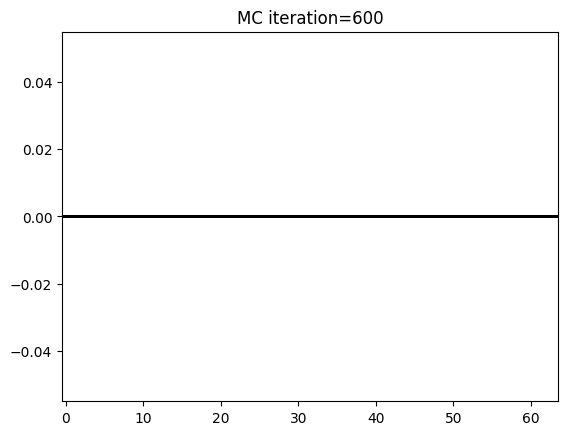


MC step= 610  Energy= -0.005859375  M= -0.00146484375
[ 1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1 -1
 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1]


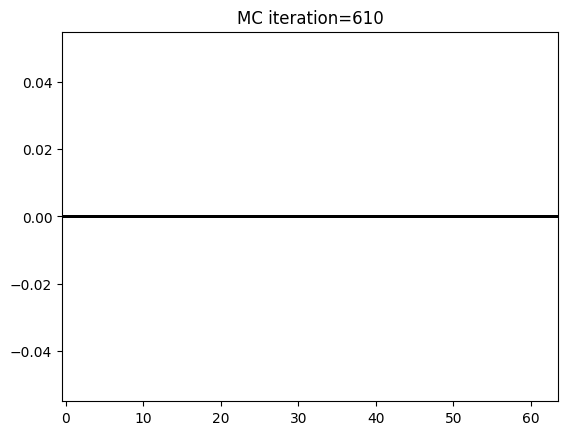


MC step= 620  Energy= -0.0068359375  M= -0.00439453125
[-1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1]


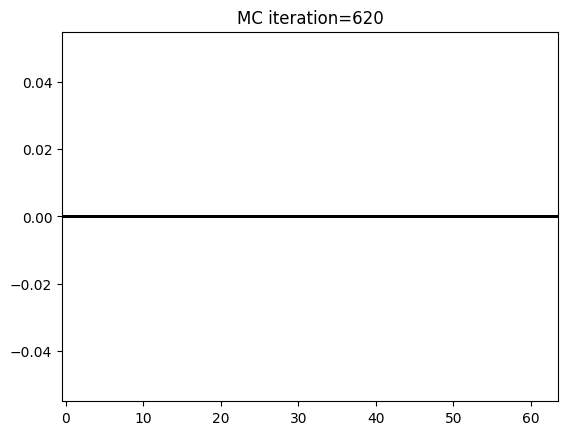


MC step= 630  Energy= -0.0029296875  M= 0.00146484375
[-1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1  1  1 -1
 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1]


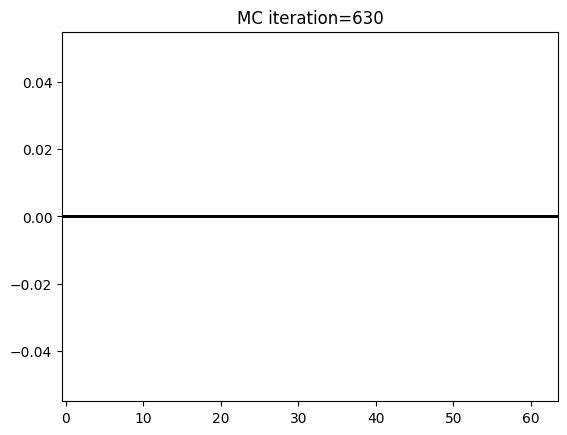


MC step= 640  Energy= -0.005859375  M= -0.00341796875
[ 1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1
  1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1]


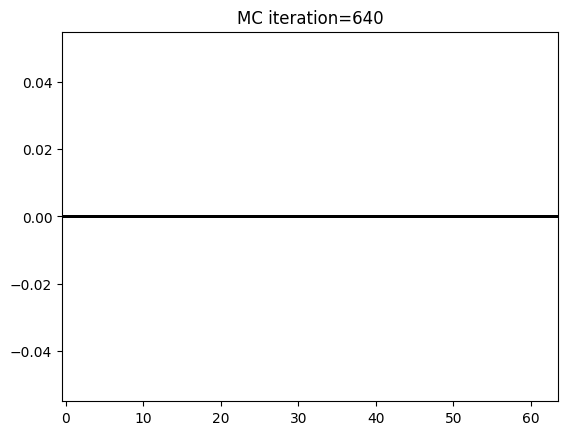


MC step= 650  Energy= -0.0078125  M= -0.001953125
[-1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1]


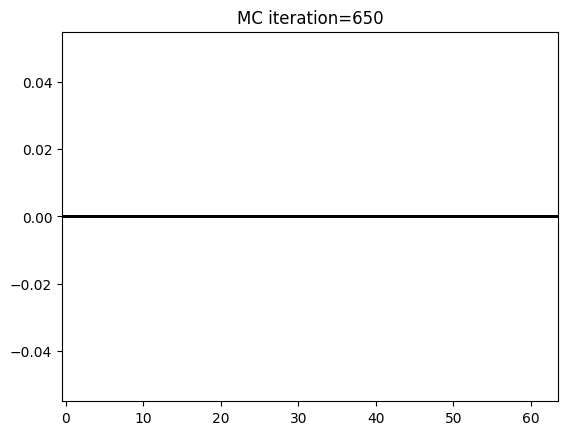


MC step= 660  Energy= -0.0048828125  M= -0.00048828125
[-1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1
  1 -1 -1  1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1]


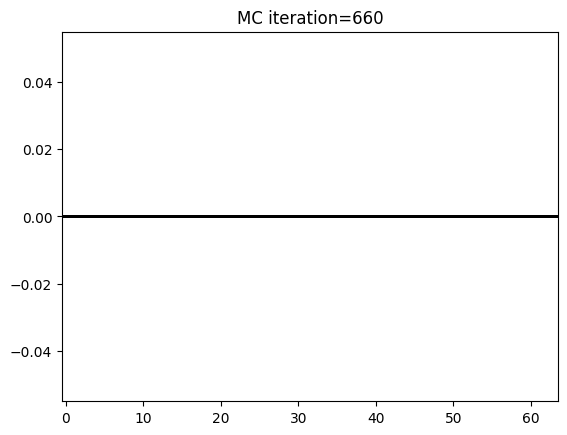


MC step= 670  Energy= -0.0078125  M= -0.0048828125
[-1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


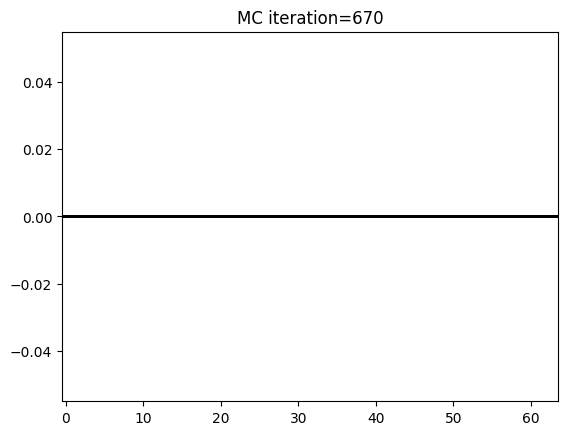


MC step= 680  Energy= -0.00390625  M= 0.00146484375
[ 1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1  1  1 -1
 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1
  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1]


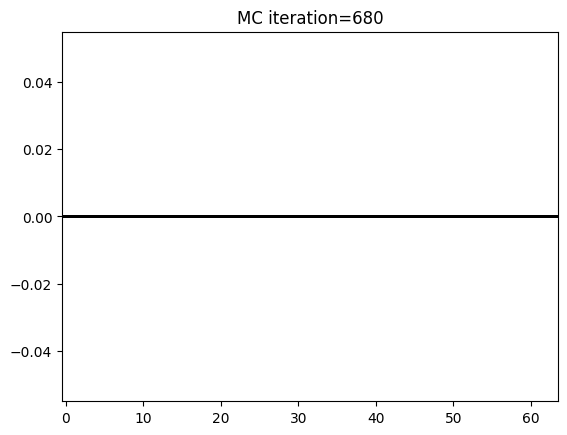


MC step= 690  Energy= -0.005859375  M= 0.0029296875
[ 1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1
 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1]


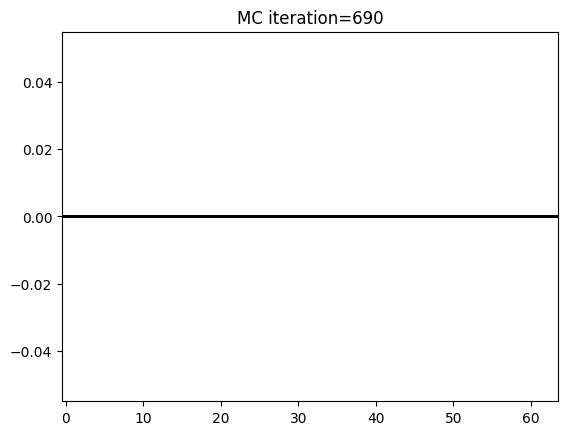


MC step= 700  Energy= -0.00390625  M= -0.00048828125
[ 1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1  1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1]


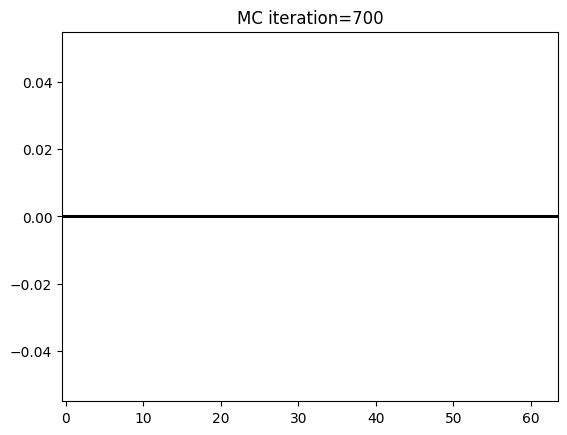


MC step= 710  Energy= -0.0068359375  M= 0.00341796875
[ 1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1
  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1
  1  1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1]


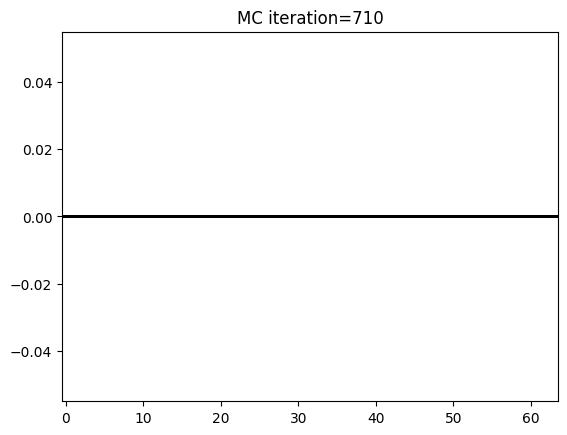


MC step= 720  Energy= -0.00390625  M= 0.0048828125
[-1 -1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1  1
 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1 -1]


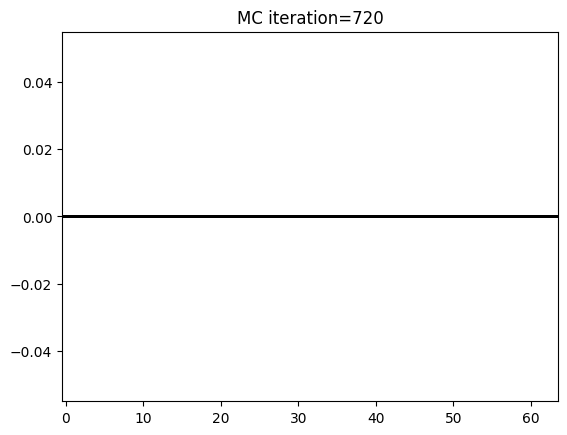


MC step= 730  Energy= -0.0068359375  M= -0.001953125
[-1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1
  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1]


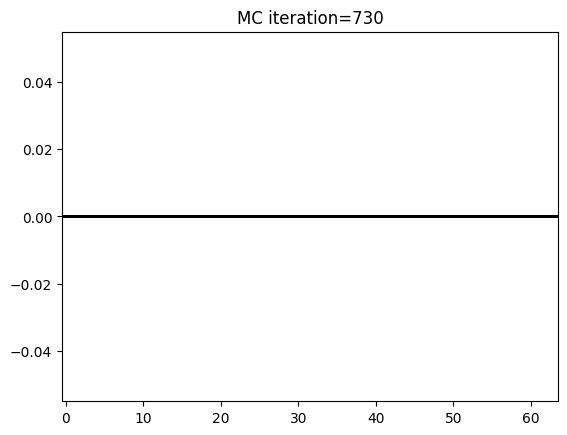


MC step= 740  Energy= -0.005859375  M= -0.00146484375
[-1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1]


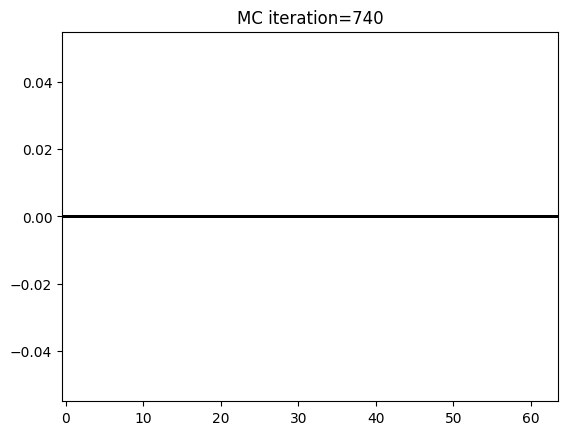


MC step= 750  Energy= -0.005859375  M= -0.0029296875
[-1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


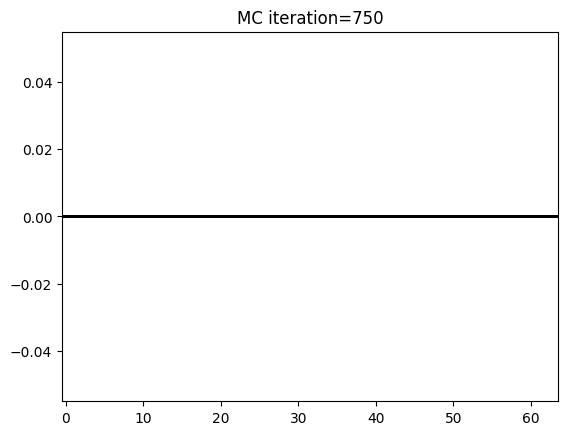


MC step= 760  Energy= -0.005859375  M= -0.00146484375
[ 1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1]


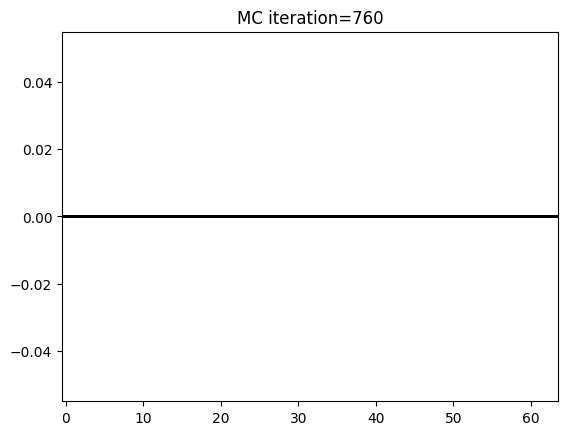


MC step= 770  Energy= -0.00390625  M= 0.00048828125
[-1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1
  1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1]


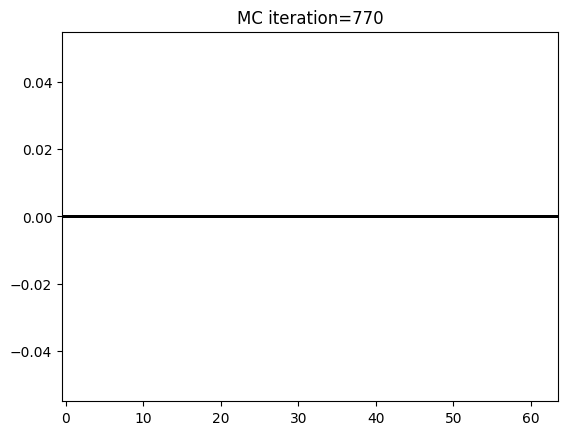


MC step= 780  Energy= -0.0078125  M= 0.00048828125
[-1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1]


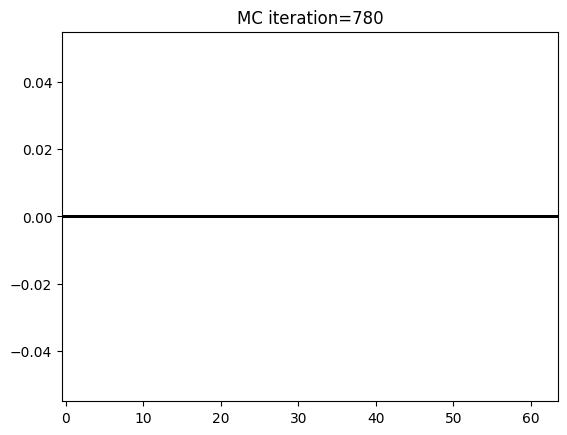


MC step= 790  Energy= -0.0078125  M= 0.00390625
[ 1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1]


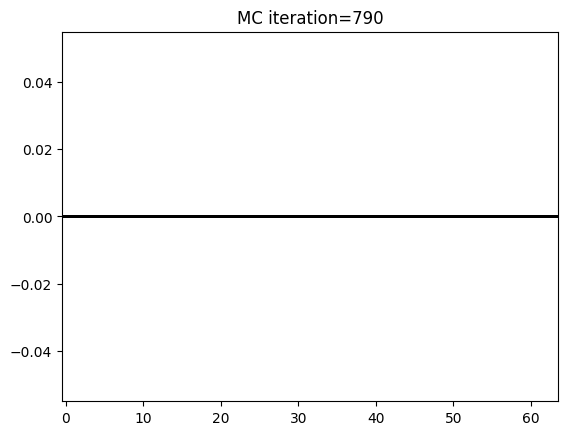


MC step= 800  Energy= -0.0029296875  M= 0.00146484375
[ 1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1
  1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1]


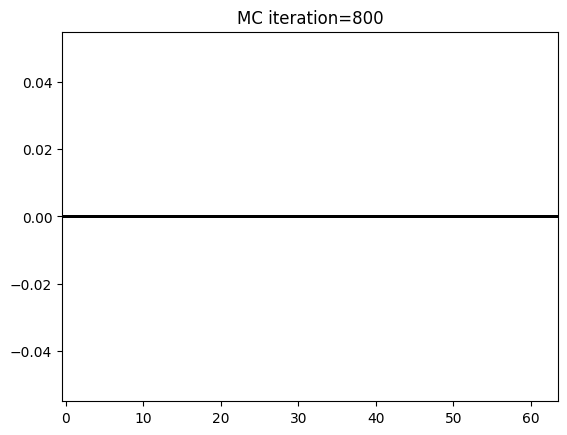


MC step= 810  Energy= -0.009765625  M= -0.0029296875
[-1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


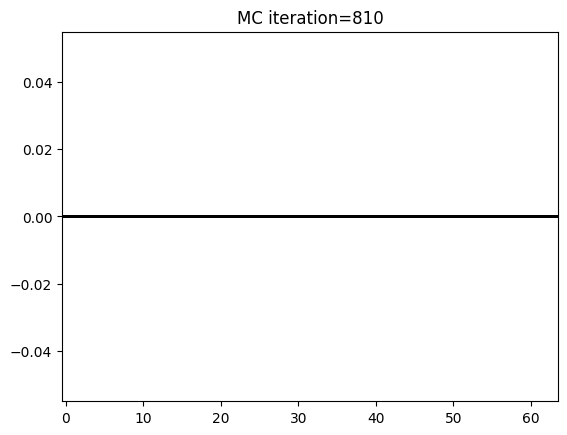


MC step= 820  Energy= -0.0068359375  M= 0.0029296875
[ 1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
 -1  1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1]


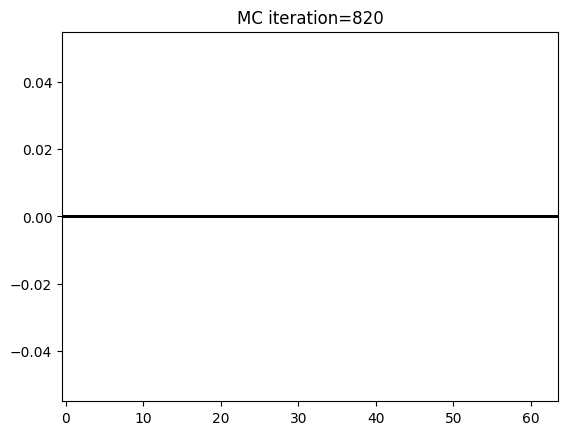


MC step= 830  Energy= -0.005859375  M= 0.00341796875
[ 1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1
 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1]


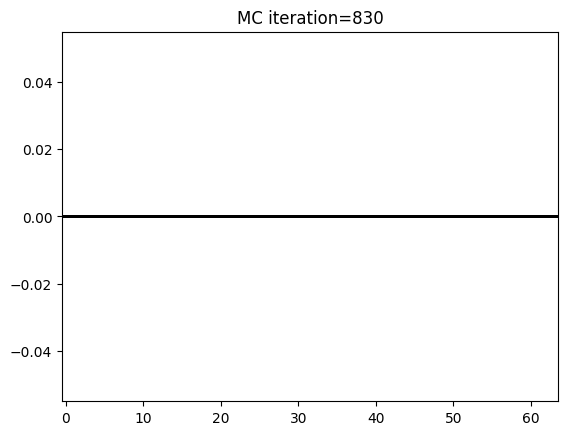


MC step= 840  Energy= -0.0068359375  M= 0.00439453125
[-1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1
  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1]


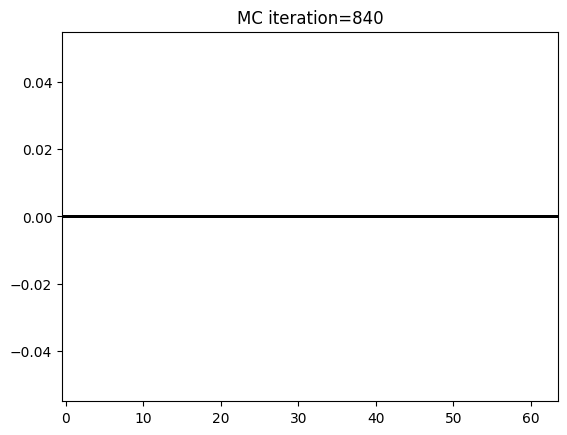


MC step= 850  Energy= -0.0087890625  M= -0.00537109375
[-1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1]


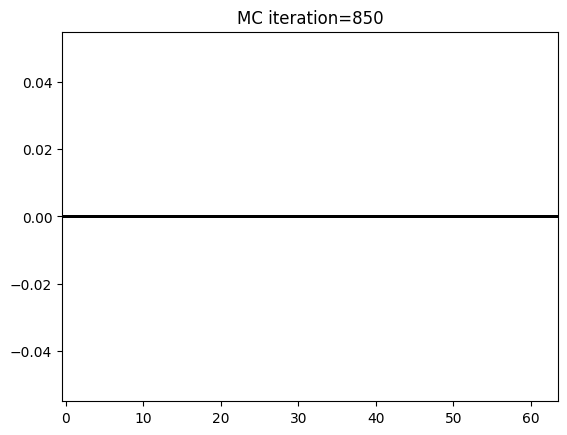


MC step= 860  Energy= -0.005859375  M= -0.00048828125
[-1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1  1  1
  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1]


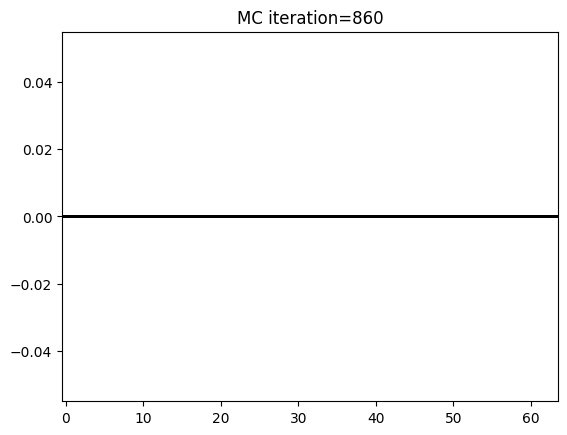


MC step= 870  Energy= -0.0068359375  M= -0.00439453125
[-1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1
  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1]


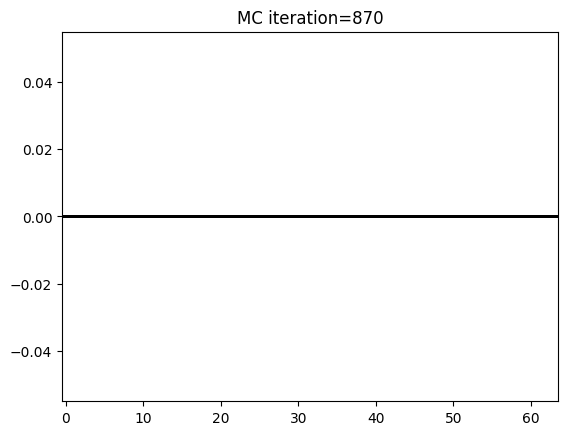


MC step= 880  Energy= -0.005859375  M= 0.00244140625
[ 1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1
  1 -1 -1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1  1]


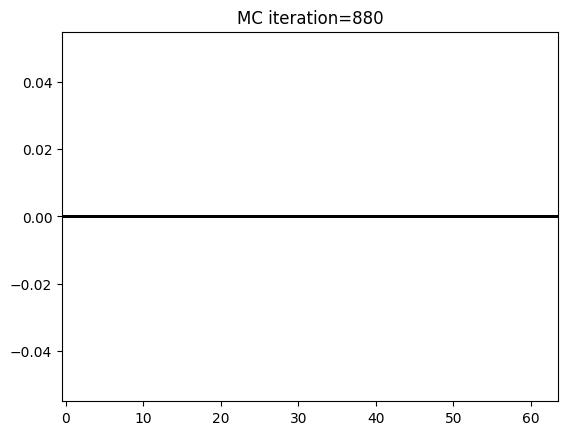


MC step= 890  Energy= -0.005859375  M= 0.00146484375
[ 1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1
 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1]


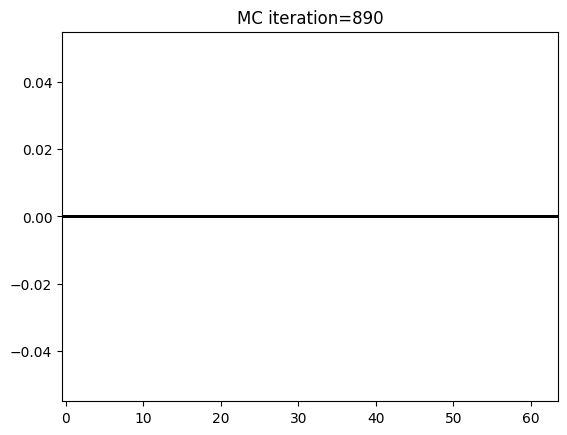


MC step= 900  Energy= -0.00390625  M= 0.001953125
[ 1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1  1
  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1]


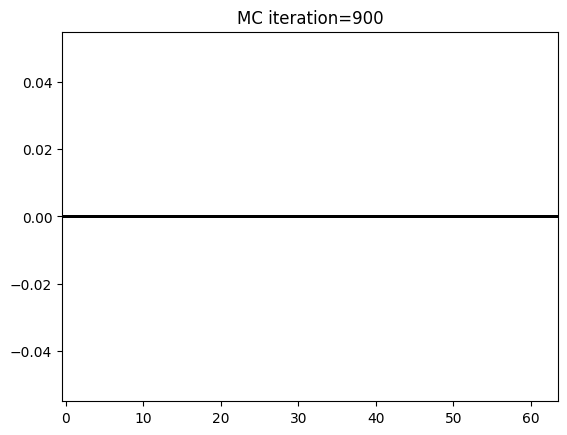


MC step= 910  Energy= -0.0029296875  M= 0.00341796875
[ 1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1
  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1 -1
 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1]


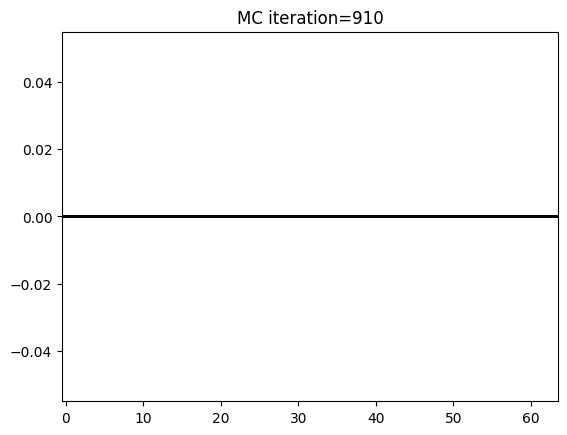


MC step= 920  Energy= -0.0087890625  M= -0.00830078125
[-1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1]


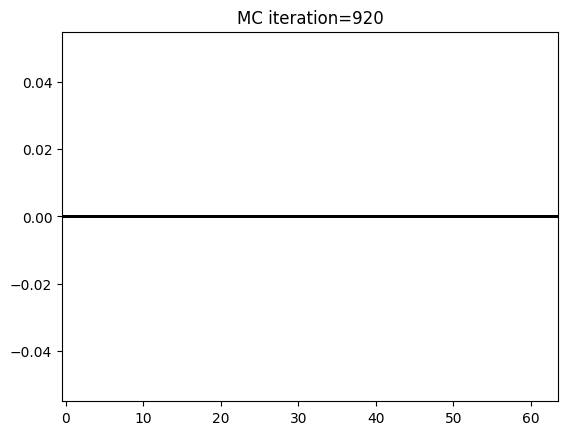


MC step= 930  Energy= -0.0029296875  M= 0.001953125
[ 1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1
  1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1]


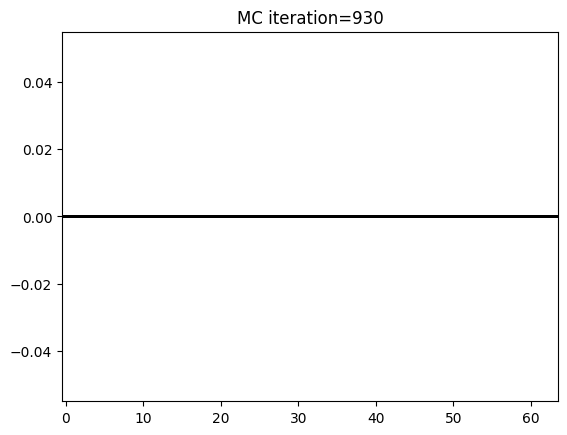


MC step= 940  Energy= -0.0078125  M= 0.00341796875
[ 1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1]


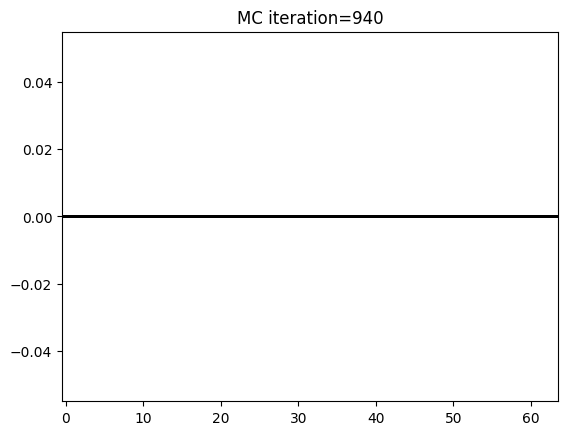


MC step= 950  Energy= -0.0029296875  M= -0.001953125
[ 1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1]


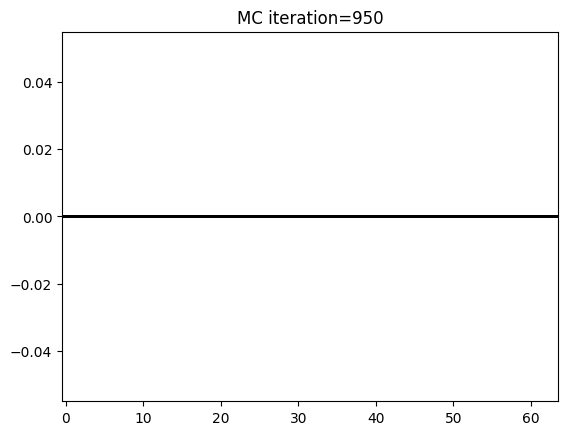


MC step= 960  Energy= -0.0068359375  M= -0.001953125
[ 1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1
 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1]


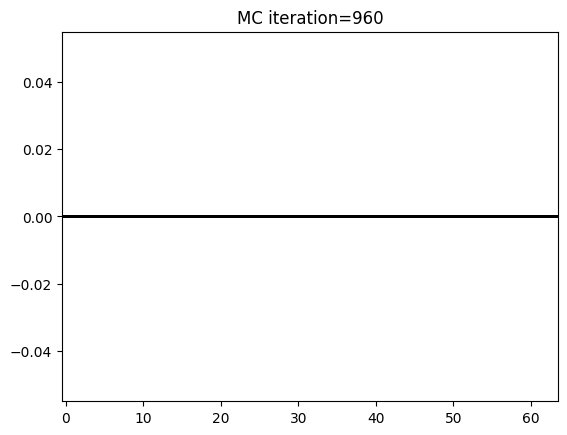


MC step= 970  Energy= -0.0048828125  M= 0.0
[ 1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1
 -1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1]


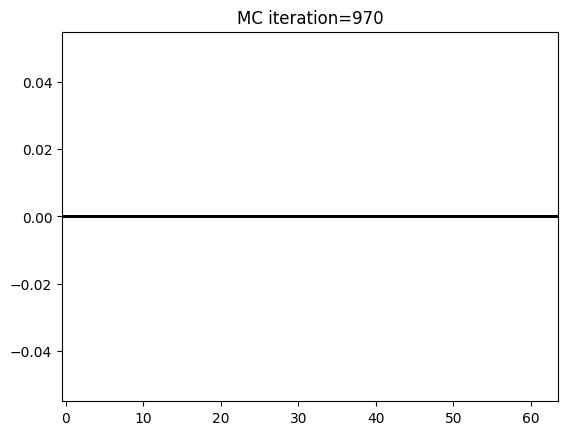


MC step= 980  Energy= -0.00390625  M= -0.001953125
[-1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1  1
  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1  1]


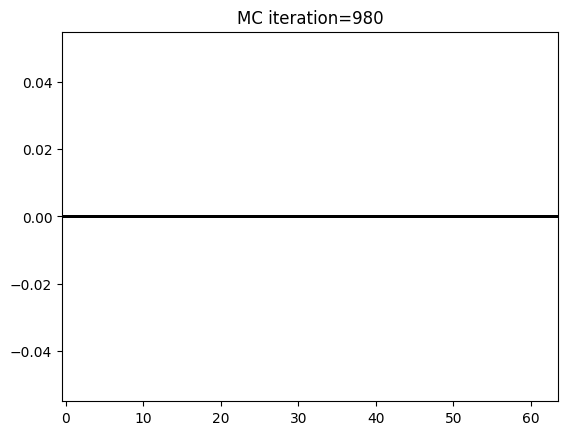


MC step= 990  Energy= -0.00390625  M= -0.00048828125
[-1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1]


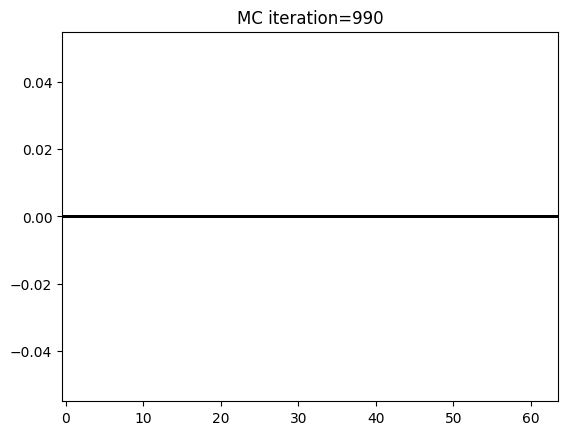


MC step= 1000  Energy= -0.0068359375  M= 0.00146484375
[ 1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1]


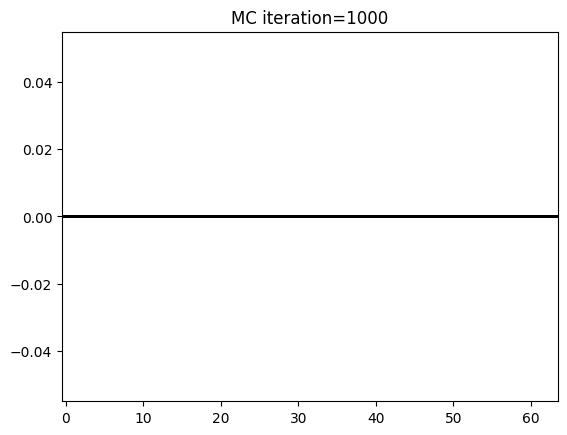


Simulation finished after 1000 MC steps


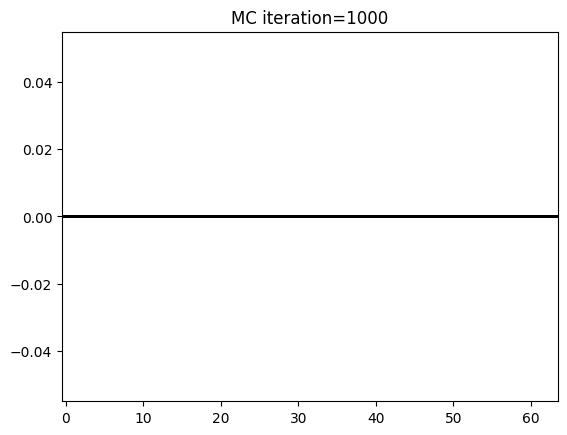

In [108]:
print("Starting MC simulation")
plt.ion()
for i in range(MCI):
  config=MCM(config,N,1/T)
  t=t+1
  Ene=calcE(config)/(N*N)
  Mag=calcM(config)/(N*N)
  step.append(t)
  E.append(Ene)
  M.append(Mag)
  if t%10==0:
    print('\nMC step=',t,' Energy=',Ene,' M=',Mag)
    print(config)
    ConfPlot(f, config, t, N)
print('\nSimulation finished after',t, 'MC steps')
plt.ioff()
ConfPlot(f, config, t, N)
plt.show()

Evolución de la Energía y Magnetización

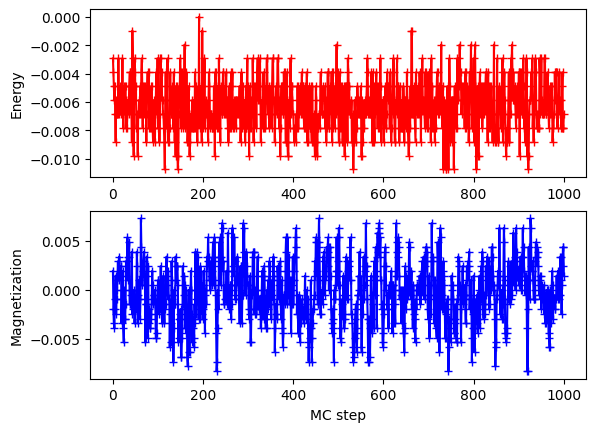

In [109]:
plt.subplot(2, 1, 1)
plt.plot(step, E, 'r+-')
plt.ylabel('Energy')

plt.subplot(2, 1, 2)
plt.plot(step, M, 'b+-')
plt.ylabel('Magnetization')
plt.xlabel('MC step')

#Show the plot in screen
plt.show()